# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．
## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors
# 単語ベクトルを読み込み
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# ベクトル化したい単語を指定して単語ベクトルを得る
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
# similarity：2単語を指定すると、単語間のコサイン類似度を計算できる
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
# most_similar：単語を指定すると、topnまでの類似度上位単語とその類似度を取得
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

# 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
# most_similar：足すベクトルと引くベクトルをそれぞれ指定した上で、計算後のベクトルと類似度が高い単語を取得
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

# 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
from tqdm import tqdm
with open('questions-words.txt', 'r') as f1, open('word_cos.txt', 'w') as f2:
    for line in tqdm(f1):  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
        line = line.split()
        if line[0] == ':':
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(cos) + '\n']))
            


19558it [1:29:13,  3.97it/s]

<_io.TextIOWrapper name='word_cos.txt' mode='w' encoding='UTF-8'>


In [7]:
!head -10 word_cos.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [8]:
with open('./word_cos.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


# 66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [9]:
!head -10 'wordsim353/combined.csv'

In [11]:
ws353 = []
with open('wordsim353/combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [12]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


/Users/funabikihikari/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


# 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
# 国名の取得
countries = set()
with open('./word_cos.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [14]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Denmark, Montenegro, Norway, Estonia, Sweden, Liechtenstein, Romania, Ireland, Netherlands, Slovenia, Hungary, Belgium, Serbia, Poland, Finland, Macedonia, Latvia, Spain, Iceland, Austria, Germany, Lithuania, Cyprus, Croatia, Bulgaria, Portugal, Switzerland, Europe, Albania, France, Greece, Italy, Turkey, Slovakia, Malta
cluster 1
Venezuela, Jamaica, Brazil, Samoa, Peru, Cuba, Fiji, Bahamas, Chile, Suriname, Nicaragua, Dominica, Guyana, Mexico, Uruguay, Ecuador, Tuvalu, Belize, Argentina, Honduras, Colombia
cluster 2
Tajikistan, Uzbekistan, Belarus, Kyrgyzstan, Armenia, Ukraine, Kazakhstan, Turkmenistan, Russia, Azerbaijan, Moldova
cluster 3
Georgia, India, Cambodia, Bangladesh, Lebanon, Taiwan, Oman, Egypt, Syria, Iraq, USA, Afghanistan, Philippines, Qatar, Vietnam, Japan, Canada, Pakistan, Thailand, Bhutan, Greenland, Iran, China, Bahrain, Malaysia, Morocco, Israel, Indonesia, Libya, Korea, Jordan, England, Australia, Nepal, Laos
cluster 4
Nigeria, Uganda, Burundi, Sudan, G

# 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

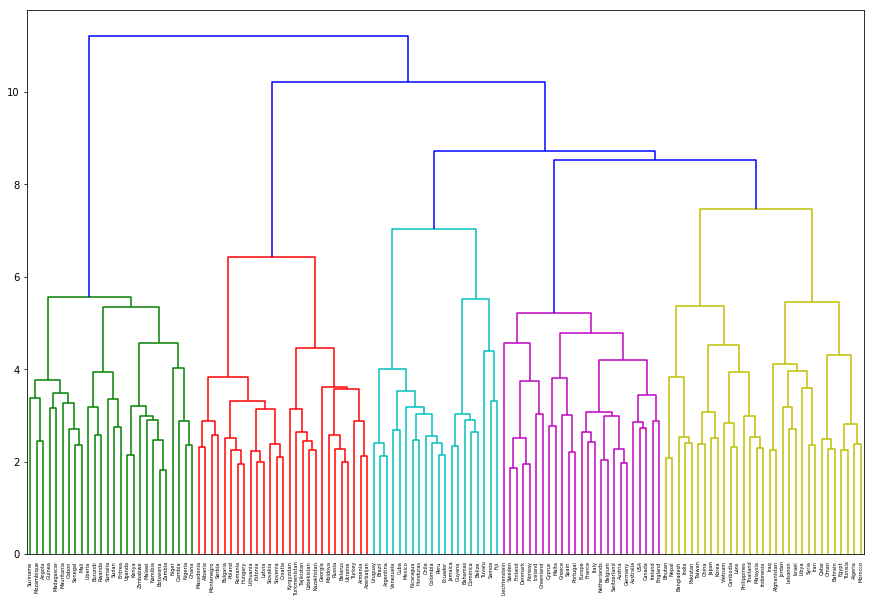

In [16]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 10))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

# 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/Users/funabikihikari/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/funabikihikari/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


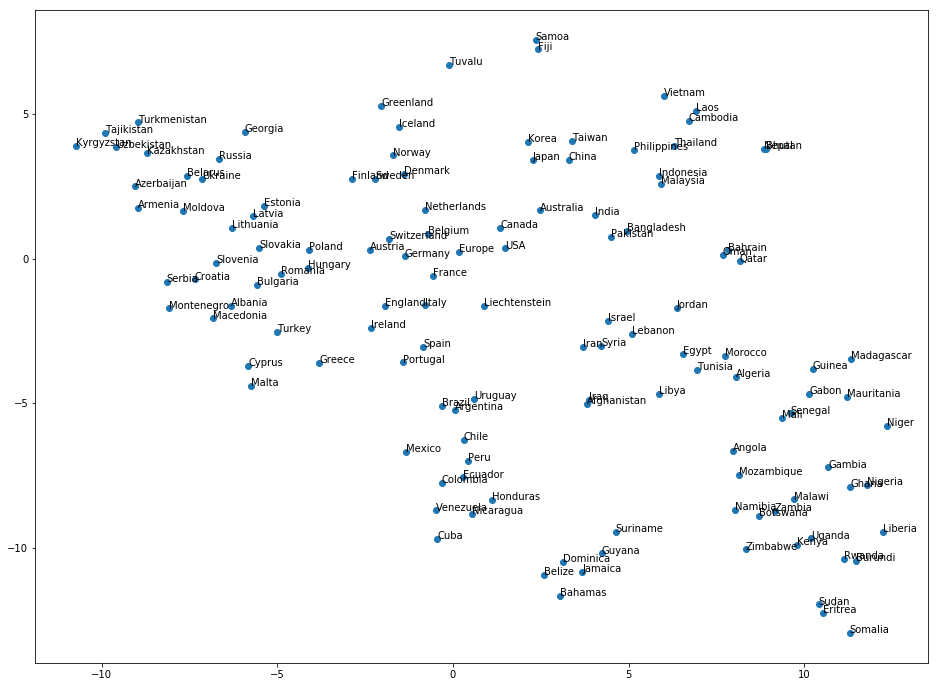

In [25]:
from sklearn.manifold import TSNE
#t-SNEで次元削減
vec_embedded = TSNE(n_components=2).fit_transform(countries_vec)
vec_embedded_t = list(zip(*vec_embedded)) 
fig, ax = plt.subplots(figsize=(16, 12))
plt.scatter(*vec_embedded_t)
for i, c in enumerate(countries):
    ax.annotate(c, (vec_embedded[i][0],vec_embedded[i][1]))

In [ ]:
#t-SNEで次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
vec_embedded = tsne.fit_transform(countries_vec)

colors =  ["r", "g", "b", "y", "k"]
fig, ax = plt.subplots(figsize=(16, 12))
for i, c in enumerate(countries):
    plt.scatter(vec_embedded[i][0],  
                vec_embedded[i][1],
                color = colors[i])
    ax.annotate(c, (vec_embedded[i][0],vec_embedded[i][1]))